<a href="https://colab.research.google.com/github/dkaratzas/ML2022-23/blob/main/Session%201%20-%20Linear%20Regression/Problems2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/ML2022-23/blob/main/Session%201%20-%20Linear%20Regression/Problems2_Solutions.ipynb>)

# Problems 2 - Polynomial Regression

## 2.1 Interpreting Gradient Descent

Suppose that for some linear regression problem we have some training set, and for our training set we managed to find some $w_0$, $w_1$ such that $J(w_0, w_1) = 0$.

Which of the statements below must then be true?

(A) Gradient descent is likely to get stuck at a local minimum and fail to find the global minimum.
 
(B) For $J(w_0, w_1) = 0$ to be true, we must have $y(i) = 0$ for every value of $i = 1, 2 ,… , m$.
 
(C) Our training set can be fit perfectly by a straight line, i.e., all of our training examples lie perfectly on some straight line.
 
(D) For $J(w_0, w_1) = 0$ to be true, we must have $w_0 = 0$ and $w_1 = 0$ so that $h_w(x) = 0$

---

*Answer*

(A) FALSE - The Mean Squares Error function (the cost function we are using) does not have any local minima, it is a convex function and has only a single global minimum

(B) FALSE - In order to have a cost = 0 it is not necessary for the points to lie on the line $y = 0$. It is only necessary for our points to lie on a straight line - any straight line.

(C) TRUE

(D) FALSE - If both parameters are zero, then the model represents an horizontal line that crosses the $(0, 0)$ point. This would give us a cost = 0 only if our points happen to lie on that particular line.

---


## 2.2 Normalization (Standardisation)

Imagine you are given 20 samples with the following values for a feature x:

In [1]:
import numpy as np

x1 = np.array([56.73040025,  42.07755103,  83.46673661, 167.79511467,
       128.41593193, 1620.39079195,  67.57569387, 124.50199413,
        91.58831309, 241.75090834,  93.69791353,  80.43787513,
        20.38769615, 171.08315486,  59.2372586 ,  15.73475339,
       122.8934116 ,  27.26541632, 217.80864704, 150.23539618])

x2 = np.array([ 0.11179419,  0.22728357, -0.08936106,  0.59369292,  0.36202046,
        0.66546626, -0.1019957 ,  0.63595947, -0.10978375,  0.68933564,
        0.05552168,  0.5122346 ,  0.04727783, -8.53652367,  0.60681752,
        0.66415377,  0.68607407,  0.15515183, -0.16490555,  0.77765625])

Note that the ranges of these two features look very different

In [2]:
print('Original range for feature 1: [{0}, {1}]'.format(x1.min(), x1.max()))
print('Original range for feature 2: [{0}, {1}]'.format(x2.min(), x2.max()))

Original range for feature 1: [15.73475339, 1620.39079195]
Original range for feature 2: [-8.53652367, 0.77765625]


<br>

First of all lets plot them along one dimension, to see what their distribution looks like. To do this, we will do a scatter plot, but will set all Y coordinates to zero.

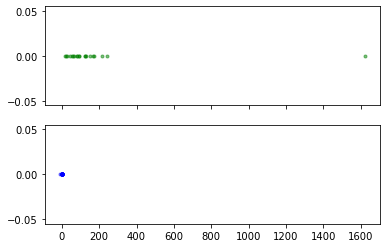

In [3]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1, np.zeros_like(x1), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2, np.zeros_like(x2), color = 'b', marker ='.', alpha=0.5)

The two features are in very different ranges, while it seems that there is one value which is quite off on the right on the top plot. This is probably an *outlier*, an error in measurement for example.

<font color=blue>Find the range of this data and normalise the data to $[0, 1]$ by subtracting the minimum value and dividing by the range you find.</font>

New range for feature 1: [0.0, 1.0]
New range for feature 2: [0.0, 1.0]


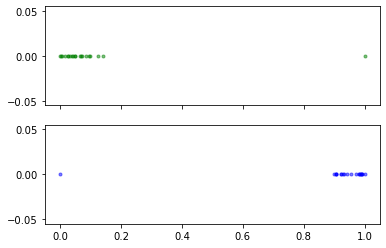

In [4]:
# Your Code Here #

x1_norm = (x1 - x1.min()) / (x1.max()-x1.min())
x2_norm = (x2 - x2.min()) / (x2.max()-x2.min())

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

<font color=blue>What do you observe? What is the effect of the outlier in the data?</blue>

---

*Answer*

We are not taking good advantage of the range between $[0, 1]$ in which we have normalised... all our data seem to be compressed in a small range betwen $[0, 0.2]$. This is caused by the outliers. By the way, we seem to have an outlier also in the second feature. If we remove the outliers and do the same, our data would expand to cover the whole range of $[0, 1]$.

---


<font color=blue>Now normalize by centering the data and dividing with the standard deviation. Plot the normalised data again, what is the range? What is the effect of normalizing like this?</font>

New range for feature 1: [-0.4859493180896712, 4.285720645276414]
New range for feature 2: [-4.301740402698035, 0.45349077190434217]


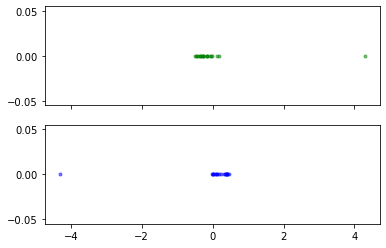

In [5]:
# Your Code Here #

x1_norm = (x1 - x1.mean()) / x1.std()
x2_norm = (x2 - x2.mean()) / x2.std()

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

---

*Answer*

The bulk of our data now is well distributed in a small region around zero. Most importantly, the two distributions now, apart from the outliers, overlap (are more or less in the same range).

If we removed the outlier, our data would still remain around the same range. So in this case, the outlier does not affect a lot how the rest of the data is normalised.

---


We now want to remove any outliers. We will consider anything above 1000 in feature 1 or anything below -5 in feature 2 as an outlier.

<font color=blue>Can you think of a way to remove the outliers? An easy way to identify these values is by using masks to index.</font>

[ True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True]
New range for feature 1: [-1.3394144956191574, 2.273165947983178]
New range for feature 2: [-1.4820988372774357, 1.4325634981142716]


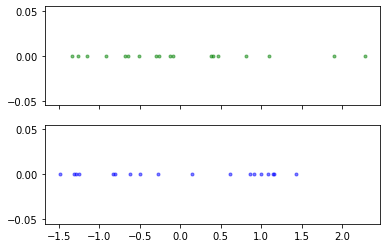

In [6]:
# Your Code Here #

mask = (x1 < 1000) & (x2 > -5)
print(mask)

x1_new = x1[mask]
x2_new = x2[mask]

#Let's also plot these new data

x1_norm = (x1_new - x1_new.mean()) / x1_new.std()
x2_norm = (x2_new - x2_new.mean()) / x2_new.std()

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

## 2.3 Multiple Linear Regression with Normalisation

Let's revisit the problem of house prices that we saw last week. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 

Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [7]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

The gradient descent function we used last time is the following. We have done a small modification to store and return the cost in every iteration, so that we can then plot the evolution of the cost during the optimisation (training) process.

[0.08050805332714407, 163.9249033496211]


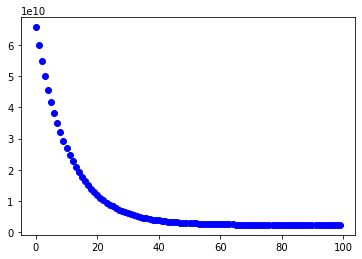

In [8]:
def GradientDescent(x, y, max_iterations=100, alpha=1):
    m = len(x) # number of samples
    J = np.zeros(max_iterations)
   
    #initialize the parameters to zero (or any other random value)
    w0 = 0
    w1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum inside the cost function
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            h = w0 + w1 * x[i]
            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]
            J[it] = J[it]+(h - y[i])**2
        Grad0 = s0 / m 
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        w0 = w0 - alpha * Grad0
        w1 = w1 - alpha * Grad1
        
    return [w0, w1], J
    
w, J = GradientDescent(size, price, alpha=0.00000001)

print(w)
plt.plot(np.arange(len(J)), J, 'bo')

<font color=blue>Use the above function with different initial values for the ws. What do you observe?</font>

---

*Answer*

The second parameter ($w_1$) converges to the same value every time, while the first parameter ($w_0$) does not move away from the initial value. It seems like the learning rate works for $w_1$ but it's too small for $w_0$.

---


<font color=blue>Now normalise your data and do the gradient descent again. What do you observe in terms of the alpha required? What do you observe in terms of the final values obtained.</font>

[340403.61773803073, 105761.32424947785]


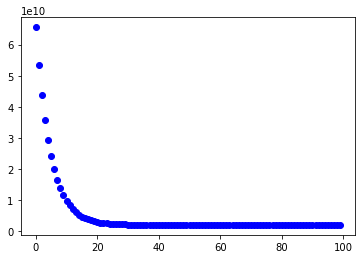

In [9]:
# Your Code Here #

size_normalised = (size-size.mean())/size.std()

w, J = GradientDescent(size_normalised, price, max_iterations=100, alpha=0.1)

print(w)
plt.plot(np.arange(len(J)), J, 'bo')

---

*Answer*

The learning rate does not need to be so small anymore. We can now find a "reasonable" value for learning rate that works.

The starting point of $w_0$ is not so important anymore, the learning rate works for both parameters.

The parameter values we obtain are very different than before (much larger)

---

<br>

<font color=blue>Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

Estimated price for a house size of 3200 =  501738.08593407413


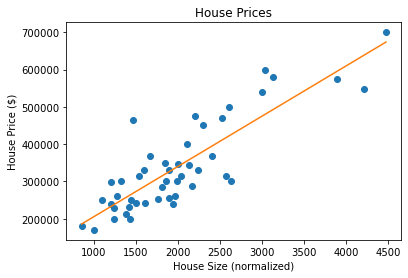

In [10]:
# Your Code Here #

# Before we can use the model, we need to normalise our features IN THE SAME WAY as during the optimisation (training) 

value_normalised = (3200 - size.mean()) / size.std()

est_price = w[0] + w[1]*value_normalised
print('Estimated price for a house size of 3200 = ', est_price)

#Let's also plot the data and the solution we have found

plt.plot(size, price,'o') # plot dots ('o') for each sample (house size, house price)
plt.title('House Prices')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price ($)')

# Plot line y = w_0 + w_1 * x
xx = range(int(min(size)),int(max(size)))
yy = [w[0] + w[1] * (x-size.mean())/size.std() for x in xx]
plt.plot(xx,yy)

## 2.4. Vectorising our code

Now let's rewrite our Gradient Descent function in a slightly more efficient form, using numpy, so that it can take as input a variable number of features. X in this case will be the design matrix of size $(samples \times (features + 1) )$ and Y will be a vector of the true outputs of size $(samples \times 1)$

In [11]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum( (np.dot(X,w) - y)**2)
    return [w, J]

Let's use the new version of Gradient Descent to calculate the parameter values 

In [12]:
#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), 
#and concatenating the size feature

size = size.reshape(-1, 1) # Make it into a column vector of shape (m, 1)
ones = np.ones_like(size) # a column vector of ones, of the same shape as "size"

X = np.hstack( (ones, size ) )

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize only X1. Do not normalise X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]]
[[ 1.          0.13000987]
 [ 1.         -0.50418984]
 [ 1.          0.50247636]
 [ 1.         -0.73572306]]


w result:  [[340403.61773803]
 [106903.9668554 ]]


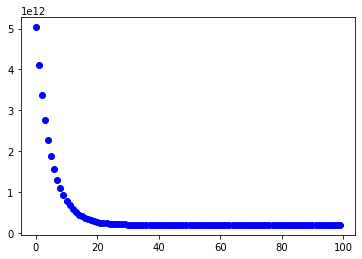

In [13]:
[w, J] = GradientDescent_np(X, price, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')

<font color=blue>Do the same, but this time using the rooms feature as well</font>

> Hint: Notice that the vectorised code applies on any size input - it does not matter how many samples or features you have (rows or columns in your design matrix), as it all reduces to a single matrix operation

[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]]
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]]
w result:  [[340403.61773803]
 [109912.67848878]
 [ -5931.10911548]]


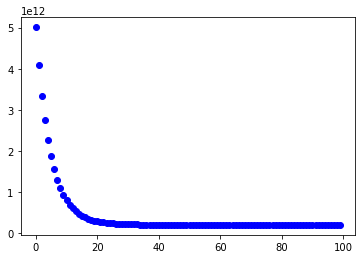

In [14]:
# Your Code Here #

#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), 
#and concatenating the size and rooms features (you could also use the np.concatenate() function)

size = size.reshape(-1, 1) # Make it into a column vector of shape (m, 1)
rooms = rooms.reshape(-1, 1) # Make it into a column vector of shape (m, 1)
ones = np.ones_like(size) # a column vector of ones, of the same shape as "size"

X = np.hstack( (ones, size, rooms ) )

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

# Run gradient descent
[w, J] = GradientDescent_np(X, price, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')

## 2.5 Polynomial Regression

Suppose you are given the following samples for a problem

In [15]:
feat = np.array([3.70559436, 2.11187022, 2.13226786, 3.17189934, 2.61453101,
       2.07442989, 0.0071344 , 0.46131173, 3.54697197, 2.62172798,
       3.48080232, 4.77734162, 3.41456927, 0.26564345, 1.54426342,
       2.96297344, 1.17560204, 4.824855  , 4.72524112, 4.2420044 ,
       2.36161998, 4.20738357, 0.65555321, 1.54366829, 2.31498197,
       3.709236  , 2.42912614, 0.68438059, 1.71768265, 1.62213085,
       1.50209452, 0.827507  , 2.07450886, 2.24060329, 3.87450188,
       3.9819535 , 2.61195064, 2.30315148, 3.89106801, 4.43644476,
       3.37459385, 4.00239524, 4.69555677, 0.20327905, 4.37835862,
       1.38281536, 2.3788225 , 3.98380478, 3.58621116, 0.73573786])

out = np.array([30.96263192, 18.1353074 , 19.01322047, 27.51746967, 21.5564388 ,
       20.36902552,  8.62646886, 11.9312829 , 30.24023043, 21.01022706,
       26.68362214, 42.44017786, 27.8180402 , 11.75634874, 15.85208479,
       25.40096482, 12.55474498, 42.58028011, 41.31397814, 35.26195553,
       20.57609693, 36.59827885, 12.12148611, 15.50647546, 19.47160702,
       30.39893467, 20.22817055, 11.57297398, 15.01927645, 16.63212174,
       15.74075133, 12.82740801, 17.47207096, 19.72061313, 34.11748197,
       34.68450945, 21.4326298 , 19.34466379, 32.74301104, 40.46357452,
       28.37694081, 32.96050834, 41.22708261, 11.37357581, 36.19880559,
       16.2084813 , 20.18300514, 34.13550541, 31.02619715, 11.07680732])

<font color=blue>Make a plot of the above samples</font>

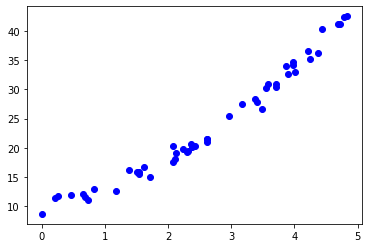

In [16]:
# Your Code Here #

plt.plot(feat, out, 'bo')

<font color=blue>Use our gradient descent function to fit a linear model to this data. Plot the resulting model along with the data. What is the final cost value?</font>

w result:  [[24.00863319]
 [ 9.62206171]]
Final cost:  208.93875334031785


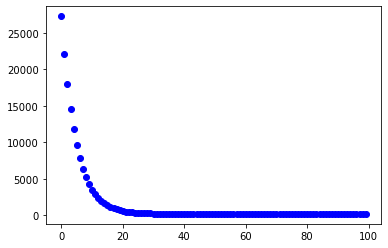

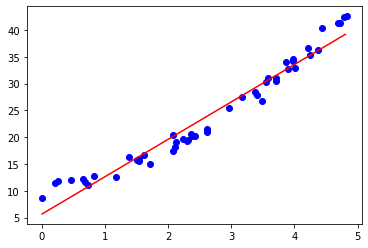

In [17]:
# Your Code Here #

feat = feat.reshape(-1, 1) # Make it into a column vector of shape (m, 1)
ones = np.ones_like(feat) # a column vector of ones, of the same shape as "size"

X = np.hstack( (ones, feat) )

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];

[w, J] = GradientDescent_np(X, out, alpha=0.1)
print('w result: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

# Plot line y = w_0 + w_1 * x
plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(min(feat),max(feat), 0.1)
yy = [w[0] + w[1] * (x-mu[1])/sigma[1] for x in xx]
plt.plot(xx, yy, 'r')

<font color=blue>Now use our gradient descent function to fit a 2-degree polynomial model to the same data. Plot the resulting model along with the data. What is the final cost value?</font>

w result:  [[24.00863319]
 [ 4.28153749]
 [ 5.57672315]]
Final cost:  52.099711150881525


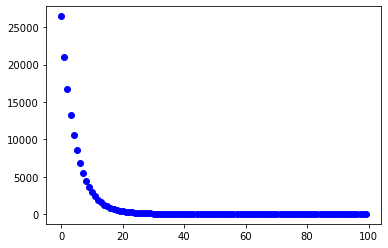

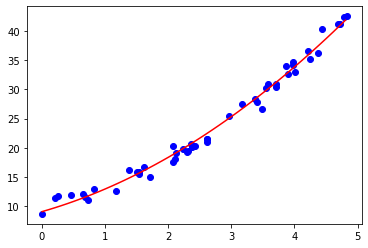

In [18]:
# Your Code Here #

feat = feat.reshape(-1, 1) # Make it into a column vector of shape (m, 1)
feat2 = feat ** 2
ones = np.ones_like(feat) # a column vector of ones, of the same shape as "size"

X = np.hstack( (ones, feat, feat2) )

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];

[w, J] = GradientDescent_np(X, out, alpha=0.1)
print('w result: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

# Plot line y = w_0 + w_1 * x
plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(min(feat),max(feat), 0.1)

yy = [w[0] + w[1] * (x-mu[1])/sigma[1] + w[2] * (x**2-mu[2])/sigma[2] for x in xx]

plt.plot(xx, yy, 'r')

## 2.6 Higher-degree Polynomial Regression

Suppose you are given the following samples for a problem:

In [19]:
import numpy as np

# This is a single feature, with 50 data points
feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84,
        2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7 ,
       -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46,
       -4.42, -1.98, -4.59, -3.27,  3.77])

# And this is the output for each of the 50 data points
out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898,
        -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015,
        -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351,
       -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515,
        47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065,
        21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155,
         4.53708356,  45.98559999,  -3.86594125,  50.79311745,
        25.99250789,  -3.46524068])

Let's make a plot of the above samples

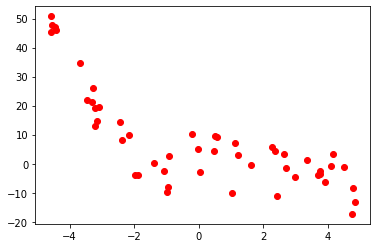

In [20]:
import matplotlib.pyplot as plt

plt.plot(feat, out, 'ro') # Plot the feature versus the output, using big red circles

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Then we would have to normalise each of these new features, using its mean and standard deviation.

To make our life easier, we will define a function that automates this process. It creates features up to a degree, calculates the means and standard deviations, and uses them to normalise them. The output would be the new design matrix for our problem.

Remember that once we calcualte our model, we should use the same procedure to generate and normalise features for new data points (our test set) before we feed them in the model. For this we would need to keep track of the means and standard deviations we used in the first place. Therefore, we can make our function return also these means and standard deviations so that we can keep them in a safe place. Finally, we can make our function use our pre-calculated means and standard deviations when we want to, instead of calculating new ones. So when we apply it on our test set, we can ask it to use the same means and standard deviations that we used for the training set.

You can skip this part and just use this function as is.

In [21]:
def mapFeatureAndNormalise_Polynomial(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

Let's create such new features up to the power of 2.

In [22]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)
print("Shape of design matrix: ", X.shape) # Expected shape = (# of samples, # features + 1)
print("Shape of means (and sigma): ", mu.shape) # Expected shape = # features + 1

Shape of design matrix:  (50, 3)
Shape of means (and sigma):  (3,)


Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. To do this, we should pass to the function the set of features up to the power of 2: `[1, feat, feat2]`

Estimated weights:  [[  7.84509192]
 [-13.60627612]
 [  7.01751284]]


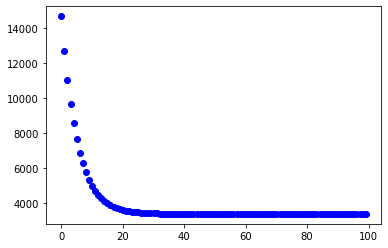

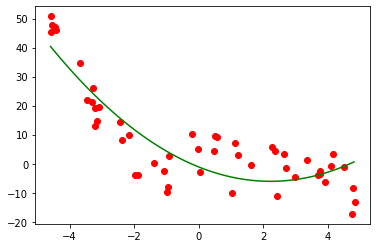

In [23]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)

w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)  # Since we passed it three features (3 columns in our design matrix), we expect to receive three weight values

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

# Plot line y = w0 + w1 * x + w2 * x^2
plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles

# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: in order to pass the values in xx through our model, we need to create and normalise polynomial features in the same way as before!

yy = [w[0] + w[1] * (x-mu[1])/sigma[1] + w[2] * (x**2-mu[2])/w[2] for x in xx] # This is a pretty inefficient way to do this

plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

Let's look in a more efficient way to pass new data through our model. We will create and normalise new features using the same `map_feature()` function, and the pre-calculated means and standard deviations. Then it should be just a matter of calculating a weighted sum (or else a dot product, vectorising this operation). It is important to see that

$y = w_0 + w_1 * x + w_2 * x^2$

is equivalent to 

$y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2$, where $x_0 = 1$, $x_1 = x$ and $x_2 = x^2$

Importantly, doing this in this vectorised form, allows us to change the number of dimensions (degrees) without having to change our code.

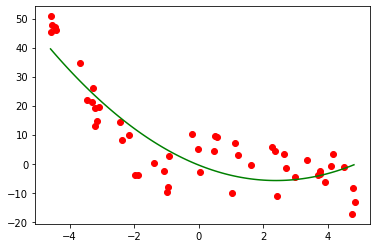

In [24]:
# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = 2, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line
plt.show()

<font color=blue>What is the final cost value of the above fit?</font>

In [25]:
#Your Code Here#

# The final Cost value is the last value we have in the list of costs (the cost at the very last iteration). We can access it by indexing at -1 (one element from the end of the list)
print('Final cost:{0}'.format(J[-1]))

Final cost:3377.9111537746257


<font color=blue>Can you fit a 3-degree polynomial and a 4-degree polynomial? What is the final cost value in these cases? HINT: to fit higher order polynomials you should just give more columns to your gradient descent, to include the corresponding 3-degree and 4-degree features.</font>

Estimated weights:  [[  7.84509192]
 [ -2.76031548]
 [  7.39547525]
 [-12.08292218]]
Final cost:  1635.6102190304023


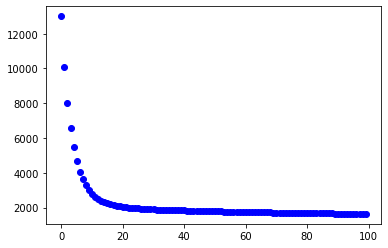

<Figure size 432x288 with 0 Axes>

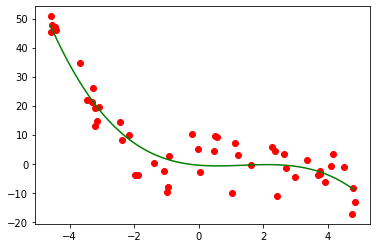

In [26]:
#Your Code Here#

D = 3 # Change this to the degree you want
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2 + theta_3 * x^3
plt.figure()
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = D, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

<font color=blue> Can you reuse the above code to create the appropriate design matrices and try to fit polynomials of up to degree 15? How does the final cost change as you try polynomials of higher degrees?</font>

14052.380179162632
5773.3539328325
3377.911083088134
1483.8079292259774
1473.1646214823013
1474.7153815223137
1409.9031501926647
1401.5375980052484
1324.4816914360965
1327.871798108485
1280.9490632736274
1283.525213188237
1264.565797490882
1264.35941310733
1261.6216606959204


Text(0, 0.5, 'Final Cost')

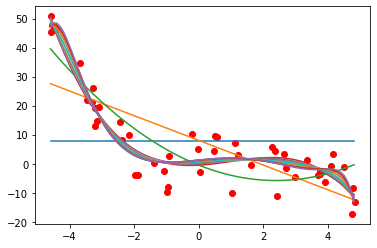

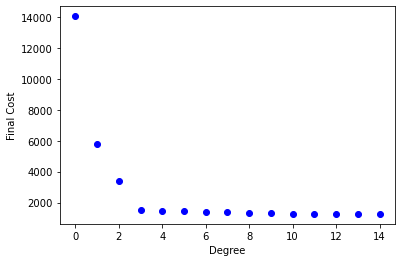

In [27]:
#Your Code Here#

costs = []

plt.figure()
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles

for D in np.arange(15):
    X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
    w, J = GradientDescent_np(X, out, max_iterations = 2000, alpha=0.1)
    
    # Keep track of the cost after
    costs.append(J[-1])
    print(J[-1])
    
    # Plot the model (not required in this exercise, but why not!)
    xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

    X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = D, preCalcMeans = mu, preCalcStd = sigma)
    yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

    plt.plot(xx, yy) # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

#Plot the evolution of final cost versus the degree
plt.figure()
plt.plot(costs, 'bo')
plt.xlabel("Degree")
plt.ylabel("Final Cost")